# Aprendizagem por Reforço com Q-Learning

- Código adaptado de: https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

## Entendimento do ambiente

In [1]:
import gym
import random

In [2]:
env = gym.make('Taxi-v3').env

In [3]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [5]:
env.reset()

168

In [6]:
# 0 = south 1 = north 2 = east 3 = west 4 = pickup 5 = dropoff
print(env.action_space)

Discrete(6)


In [7]:
5*5*5*4

500

In [8]:
# 4 destinos
print(env.observation_space)

Discrete(500)


In [9]:
len(env.P)

500

In [10]:
env.P[484]

{0: [(1.0, 484, -1, False)],
 1: [(1.0, 384, -1, False)],
 2: [(1.0, 484, -1, False)],
 3: [(1.0, 464, -1, False)],
 4: [(1.0, 484, -10, False)],
 5: [(1.0, 484, -10, False)]}

## Treinamento

Diferença temporal (Q-learning)

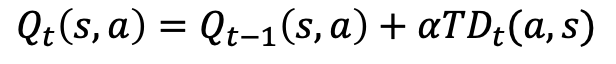

In [11]:
random.uniform(0, 1)

0.06630870757365337

In [12]:
env.action_space

Discrete(6)

In [13]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table.shape

(500, 6)

In [14]:
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [15]:
np.argmax(np.array([3, 5]))

1

In [16]:
# 1-10% 3-90%
# exploration / exploitation
# 0 = south 1 = north 2 = east 3 = west 4 = pickup 5 = dropoff
#%%time
from IPython.display import clear_output

alpha = 0.1
gamma = 0.6
epsilon = 0.1

# episódios
for i in range(100000):
  estado = env.reset()

  penalidades, recompensa = 0, 0
  done = False
  while not done:
    # Exploração
    if random.uniform(0, 1) < epsilon:
      acao = env.action_space.sample()
    # Exploitation
    else:
      acao = np.argmax(q_table[estado])

    proximo_estado, recompensa, done, info = env.step(acao)

    q_antigo = q_table[estado, acao]
    
    # quero encontrar um caminho que o taxi maximize a recompensa
    proximo_maximo = np.max(q_table[proximo_estado])

    q_novo = (1 - alpha) * q_antigo + alpha * (recompensa + gamma * proximo_maximo)
    q_table[estado, acao] = q_novo

    if recompensa == -10:
      penalidades += 1

    estado = proximo_estado

  if i % 100 == 0:
    clear_output(wait=True)
    print('Episódio: ', i)

print('Treinamento concluído')

Episódio:  99900
Treinamento concluído


In [17]:
# 0 = south 1 = north 2 = east 3 = west 4 = pickup 5 = dropoff
q_table[346]

array([ -2.49147061,  -2.48236806,  -2.48818494,  -2.49189339,
       -10.91905539, -10.53024569])

In [18]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [19]:
env.step(1)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


In [20]:
env.step(1)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


In [21]:
env.encode(3, 2, 1, 2)

346

## Avaliação

In [22]:
total_penalidades = 0
episodios = 50
frames = []

for _ in range(episodios):
  estado = env.reset()
  penalidades, recompensa = 0, 0
  done = False
  while not done:
    acao = np.argmax(q_table[estado])
    estado, recompensa, done, info = env.step(acao)

    if recompensa == -10:
      penalidades += 1
    
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': estado,
        'action': acao,
        'reward': recompensa
    })

  total_penalidades += penalidades

print('Episódios', episodios)
print('Penalidades', total_penalidades)

Episódios 50
Penalidades 0


In [23]:
frames[0]

{'action': 0,
 'frame': '+---------+\n|R: | : :\x1bG\x1b|\n| :\x1b \x1b| : : |\n| : : : : |\n| | : | : |\n|Y| : |\x1bB\x1b: |\n+---------+\n  (South)\n',
 'reward': -1,
 'state': 127}

In [24]:
from time import sleep
for frame in frames:
  clear_output(wait=True)
  print(frame['frame'])
  print('Estado', frame['state'])
  print('Ação', frame['action'])
  print('Recompensa', frame['reward'])
  sleep(.5)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Estado 85
Ação 5
Recompensa 20
